In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport

pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns',999)

# We're going to load customer data from a real UK E-commerce shop and use Clustering + Explanatory Data Analysis to get insights on our customers

In [2]:
df = pd.read_csv('bruh.csv')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.00,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12648 entries, 0 to 12647
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      12648 non-null  object 
 1   StockCode    12648 non-null  object 
 2   Description  12627 non-null  object 
 3   Quantity     12648 non-null  int64  
 4   InvoiceDate  12648 non-null  object 
 5   Price        12647 non-null  float64
 6   Customer ID  9570 non-null   float64
 7   Country      12647 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 790.6+ KB


In [5]:
df["StockCode"] = df["StockCode"].astype("str")
df["StockCode"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V'], dtype=object)

In [6]:
cleaned_df = df.copy()

In [7]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
    
)

cleaned_df[mask]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
12643,490403,22176,BLUE OWL SOFT TOY,1,12/6/09 11:13,2.95,17920.00,United Kingdom
12644,490403,22175,PINK OWL SOFT TOY,1,12/6/09 11:13,2.95,17920.00,United Kingdom
12645,490403,84327A,PINK JUMPER LARRY THE LAMB,6,12/6/09 11:13,2.10,17920.00,United Kingdom
12646,490403,84586L,"PINK ROSES/GINGHAM PATCH RABBIT 8""",2,12/6/09 11:13,2.95,17920.00,United Kingdom


In [8]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$")) |
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")) |
    (cleaned_df["StockCode"] == "PADS")
)

cleaned_df[mask]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
12643,490403,22176,BLUE OWL SOFT TOY,1,12/6/09 11:13,2.95,17920.00,United Kingdom
12644,490403,22175,PINK OWL SOFT TOY,1,12/6/09 11:13,2.95,17920.00,United Kingdom
12645,490403,84327A,PINK JUMPER LARRY THE LAMB,6,12/6/09 11:13,2.10,17920.00,United Kingdom
12646,490403,84586L,"PINK ROSES/GINGHAM PATCH RABBIT 8""",2,12/6/09 11:13,2.95,17920.00,United Kingdom


In [9]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,12648.00,12647.00,9570.00
mean,9.95,4.20,15502.10
std,87.57,23.64,1652.58
min,-1043.00,0.00,12349.00
25%,1.00,1.25,14087.00
50%,3.00,2.57,15546.00
75%,8.00,4.95,16918.00
max,5184.00,1998.49,18287.00


In [10]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)
cleaned_df.describe()

,Quantity,Price,Customer ID
count,9570.00,9570.00,9570.00
mean,13.07,3.30,15502.10
std,97.00,20.74,1652.58
min,-600.00,0.00,12349.00
25%,2.00,1.25,14087.00
50%,4.00,2.10,15546.00
75%,12.00,3.75,16918.00
max,5184.00,1998.49,18287.00


In [11]:
cleaned_df.loc[cleaned_df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/09 10:33,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/09 10:33,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/09 10:33,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/09 10:33,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/09 10:33,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
11984,C490358,85066,CREAM SWEETHEART MINI CHEST,-3,12/4/09 16:51,10.95,18225.00,United Kingdom
11985,C490358,21535,RETRO SPOT SMALL MILK JUG,-2,12/4/09 16:51,2.55,18225.00,United Kingdom
11986,C490358,21539,RETRO SPOTS BUTTER DISH,-1,12/4/09 16:51,4.95,18225.00,United Kingdom
11987,C490358,21258,VICTORIAN SEWING BOX LARGE,-5,12/4/09 16:51,10.95,18225.00,United Kingdom


In [12]:
cleaned_df = cleaned_df.loc[cleaned_df["Quantity"] >= 0]
cleaned_df.describe()

,Quantity,Price,Customer ID
count,9373.00,9373.00,9373.00
mean,13.70,3.06,15503.90
std,97.38,3.72,1648.99
min,1.00,0.00,12359.00
25%,2.00,1.25,14087.00
50%,4.00,2.10,15550.00
75%,12.00,3.75,16918.00
max,5184.00,141.00,18229.00


In [13]:
cleaned_df = cleaned_df.loc[cleaned_df["Price"] > 0]

In [14]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,9371.00,9371.00,9371.00
mean,13.71,3.06,15503.81
std,97.39,3.72,1649.15
min,1.00,0.06,12359.00
25%,2.00,1.25,14087.00
50%,4.00,2.10,15542.00
75%,12.00,3.75,16918.00
max,5184.00,141.00,18229.00


In [15]:
cleaned_df["Sales"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.00,United Kingdom,30.00


In [16]:
cleaned_df["PurchaseFreq"] = cleaned_df.groupby("Customer ID")["Customer ID"].transform("count")
cleaned_df.head(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,PurchaseFreq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.00,United Kingdom,83.40,26
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom,81.00,26
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.00,United Kingdom,81.00,26
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.00,United Kingdom,100.80,26
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.00,United Kingdom,30.00,26
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/09 7:45,1.65,13085.00,United Kingdom,39.60,26
6,489434,21871,SAVE THE PLANET MUG,24,12/1/09 7:45,1.25,13085.00,United Kingdom,30.00,26
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/09 7:45,5.95,13085.00,United Kingdom,59.50,26
8,489435,22350,CAT BOWL,12,12/1/09 7:46,2.55,13085.00,United Kingdom,30.60,26
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/09 7:46,3.75,13085.00,United Kingdom,45.00,26


In [17]:
cleaned_df.describe()

,Quantity,Price,Customer ID,Sales,PurchaseFreq
count,9371.00,9371.00,9371.00,9371.00,9371.00
mean,13.71,3.06,15503.81,22.53,48.72
std,97.39,3.72,1649.15,75.79,36.08
min,1.00,0.06,12359.00,0.06,1.00
25%,2.00,1.25,14087.00,4.48,22.00
50%,4.00,2.10,15542.00,11.70,40.00
75%,12.00,3.75,16918.00,19.50,64.00
max,5184.00,141.00,18229.00,1800.00,164.00


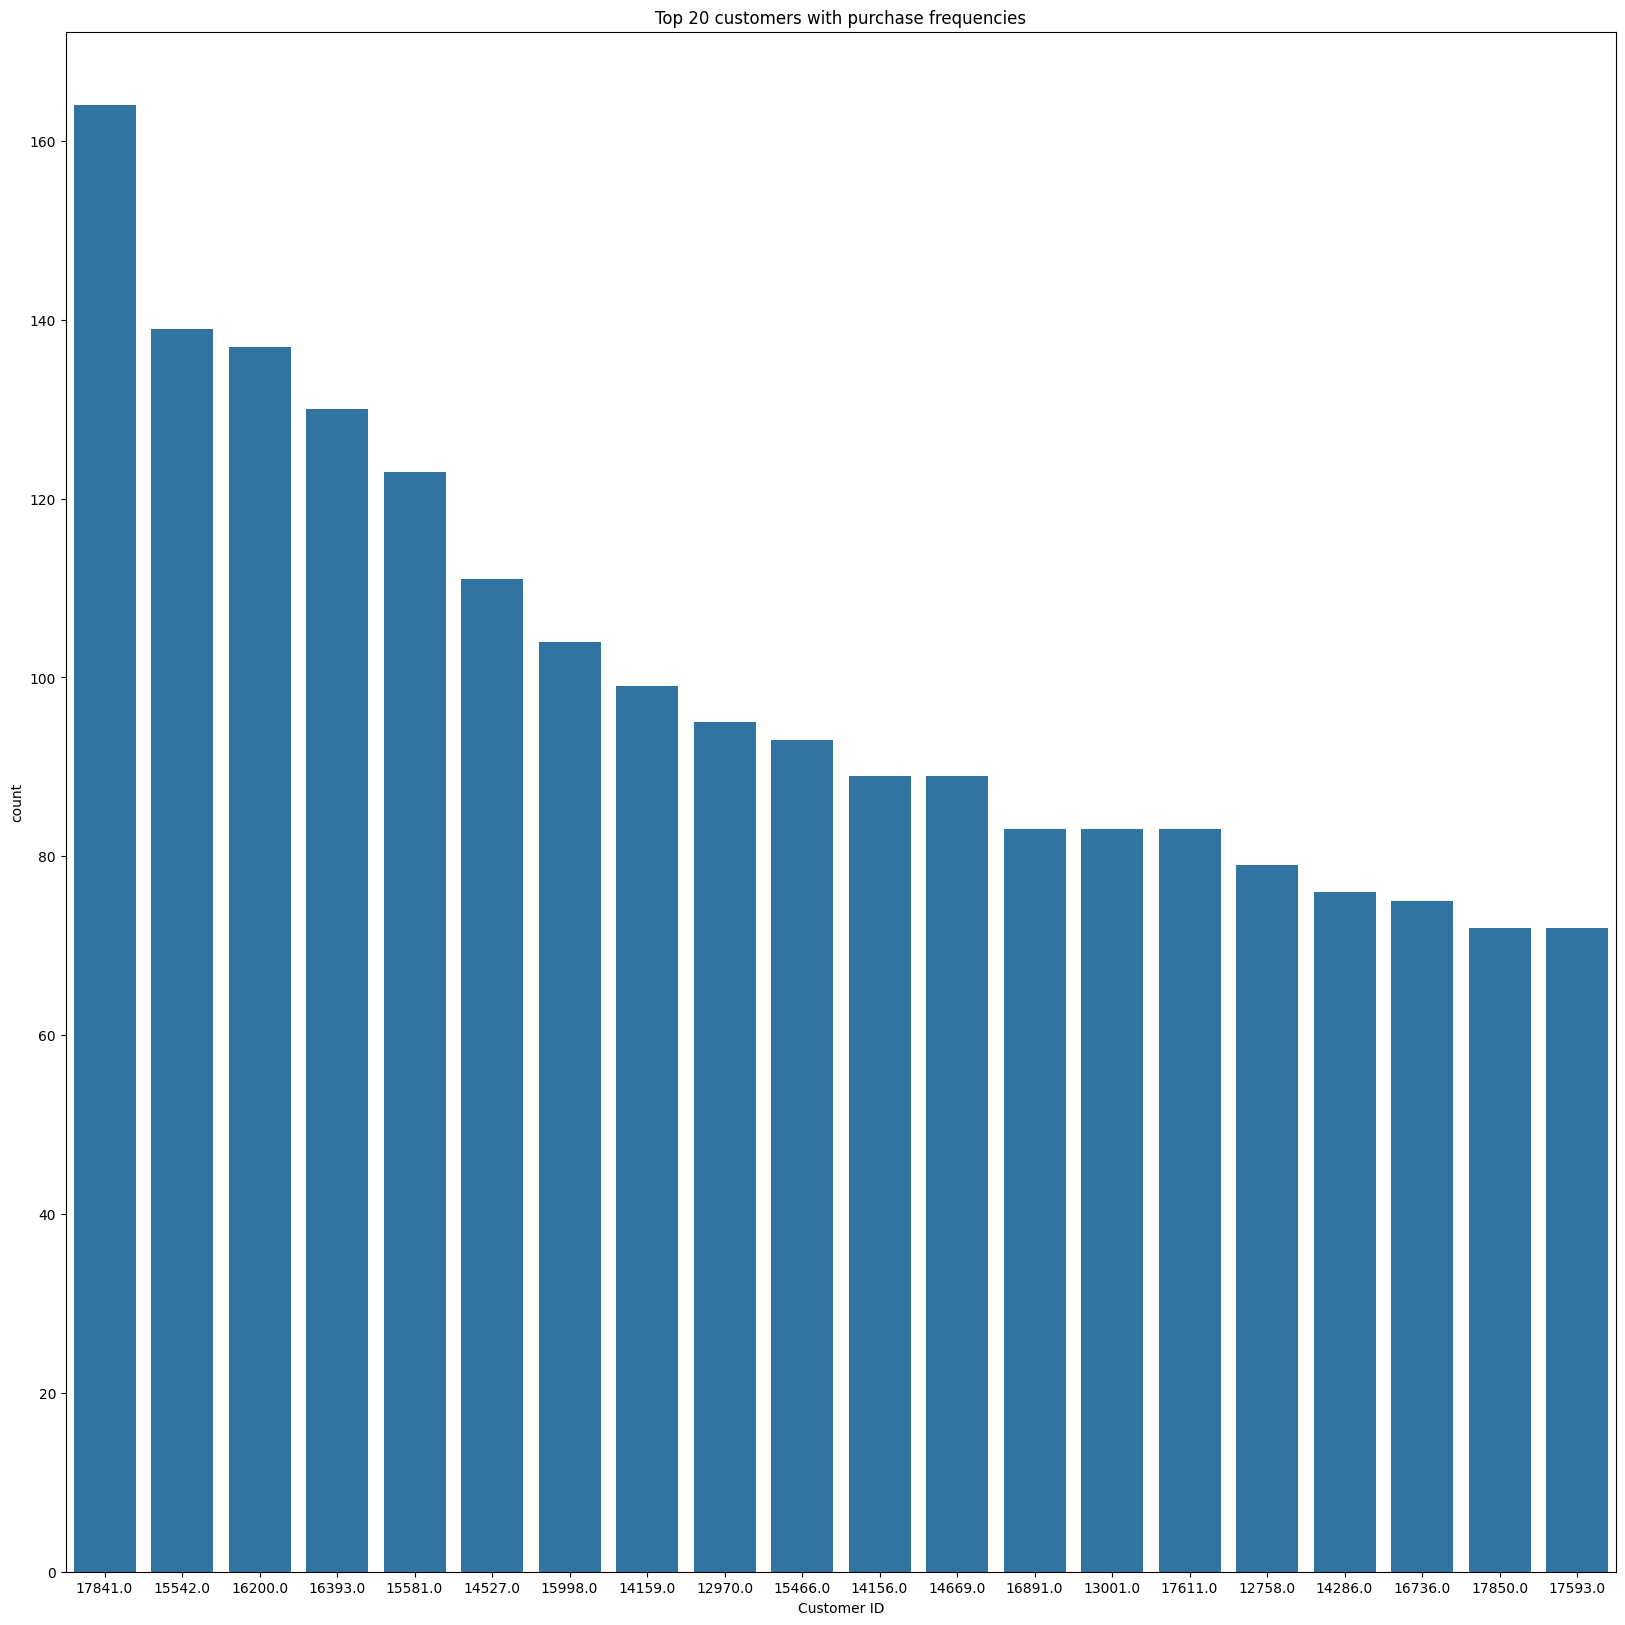

In [18]:
plt.figure(figsize=(20,20))
sns.countplot(data=cleaned_df, x=cleaned_df["Customer ID"], order=cleaned_df["Customer ID"].value_counts().index[:20])
plt.title("Top 20 customers with purchase frequencies")
plt.show()

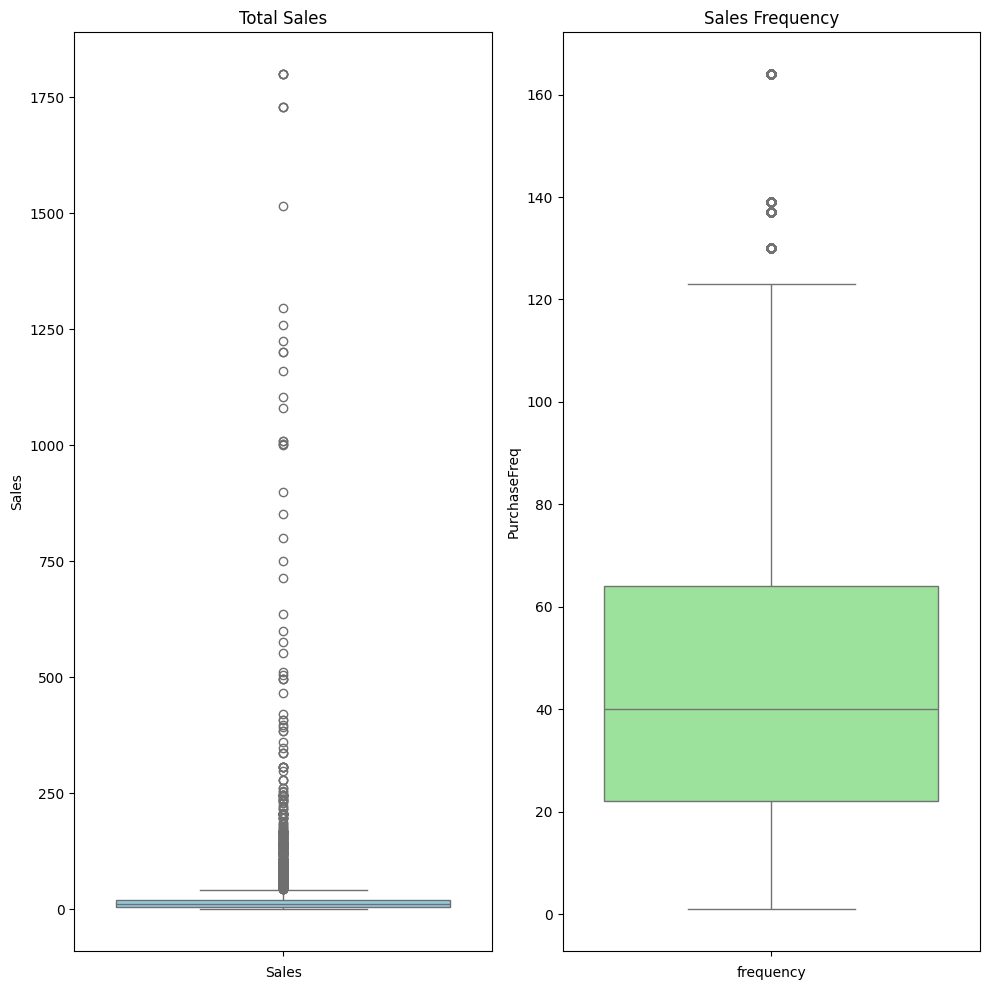

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
sns.boxplot(data=cleaned_df["Sales"], color='skyblue')
plt.title("Total Sales")
plt.xlabel("Sales")

plt.subplot(1,2,2)
sns.boxplot(data=cleaned_df["PurchaseFreq"], color='lightgreen')
plt.title("Sales Frequency")
plt.xlabel("frequency")

plt.tight_layout()
plt.show()

In [20]:
# Money column
mQ1, mQ3 = cleaned_df["Sales"].quantile([0.25, 0.75])
mIQR = mQ3 - mQ1
m_lower, m_upper = mQ1 - 1.5*mIQR, mQ3 + 1.5*mIQR

# Freq column
fQ1, fQ3 = cleaned_df["PurchaseFreq"].quantile([0.25, 0.75])
fIQR = fQ3 - fQ1
f_lower, f_upper = fQ1 - 1.5*fIQR, fQ3 + 1.5*fIQR

# Keep only rows that are within both ranges
cleaned_no_outliers = cleaned_df[
    cleaned_df["Sales"].between(m_lower, m_upper) &
    cleaned_df["PurchaseFreq"].between(f_lower, f_upper)
].copy()


In [21]:
print("Original size:", cleaned_df.shape)
print("Without outliers:", cleaned_no_outliers.shape)


Original size: (9371, 10)
Without outliers: (8040, 10)


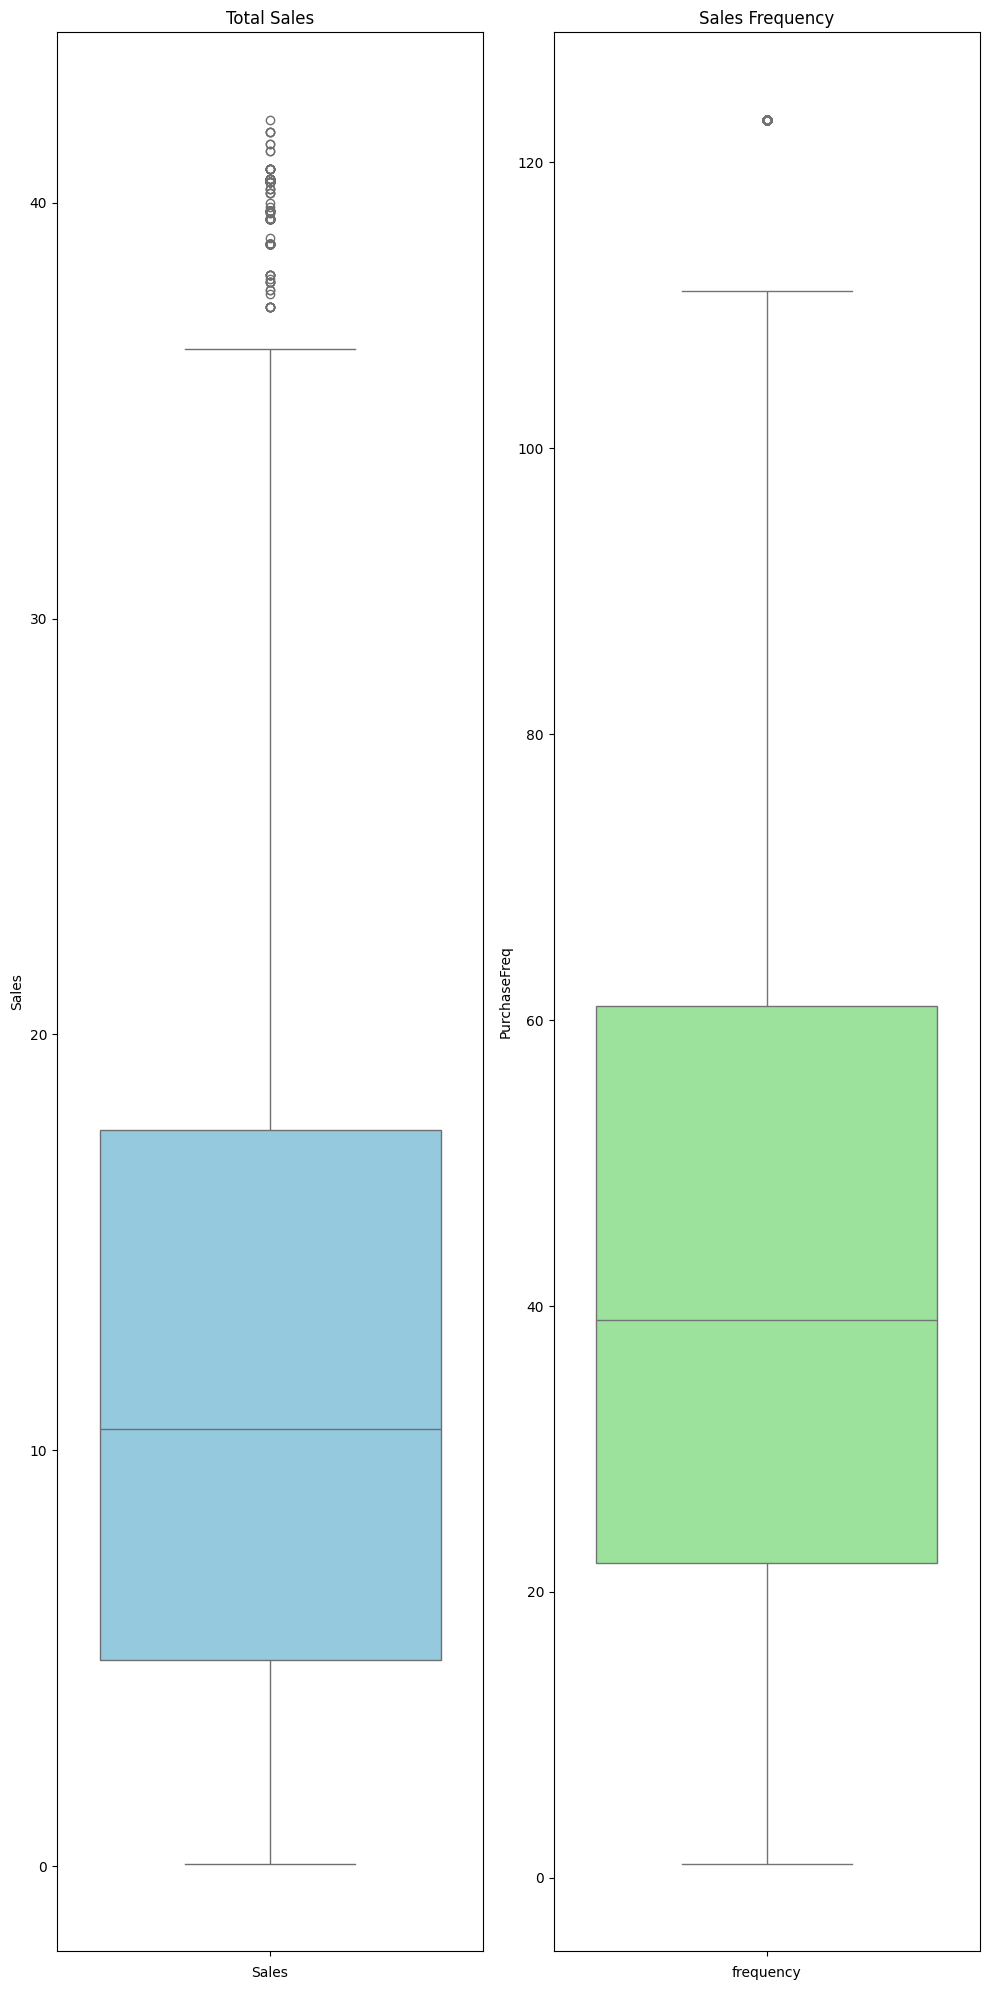

In [22]:
plt.figure(figsize=(10,20))

plt.subplot(1,2,1)
sns.boxplot(data=cleaned_no_outliers["Sales"], color='skyblue')
plt.title("Total Sales")
plt.xlabel("Sales")

plt.subplot(1,2,2)
sns.boxplot(data=cleaned_no_outliers["PurchaseFreq"], color='lightgreen')
plt.title("Sales Frequency")
plt.xlabel("frequency")

plt.tight_layout()
plt.show()

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_no_outliers[["Sales", "PurchaseFreq"]])
scaled_df = pd.DataFrame(scaled_data, index=cleaned_no_outliers.index, columns=["Sales", "PurchaseFreq"])
scaled_df.describe()

,Sales,PurchaseFreq
count,8040.00,8040.00
mean,0.00,0.00
std,1.00,1.00
min,-1.32,-1.57
25%,-0.80,-0.80
50%,-0.21,-0.19
75%,0.56,0.61
max,3.16,2.87


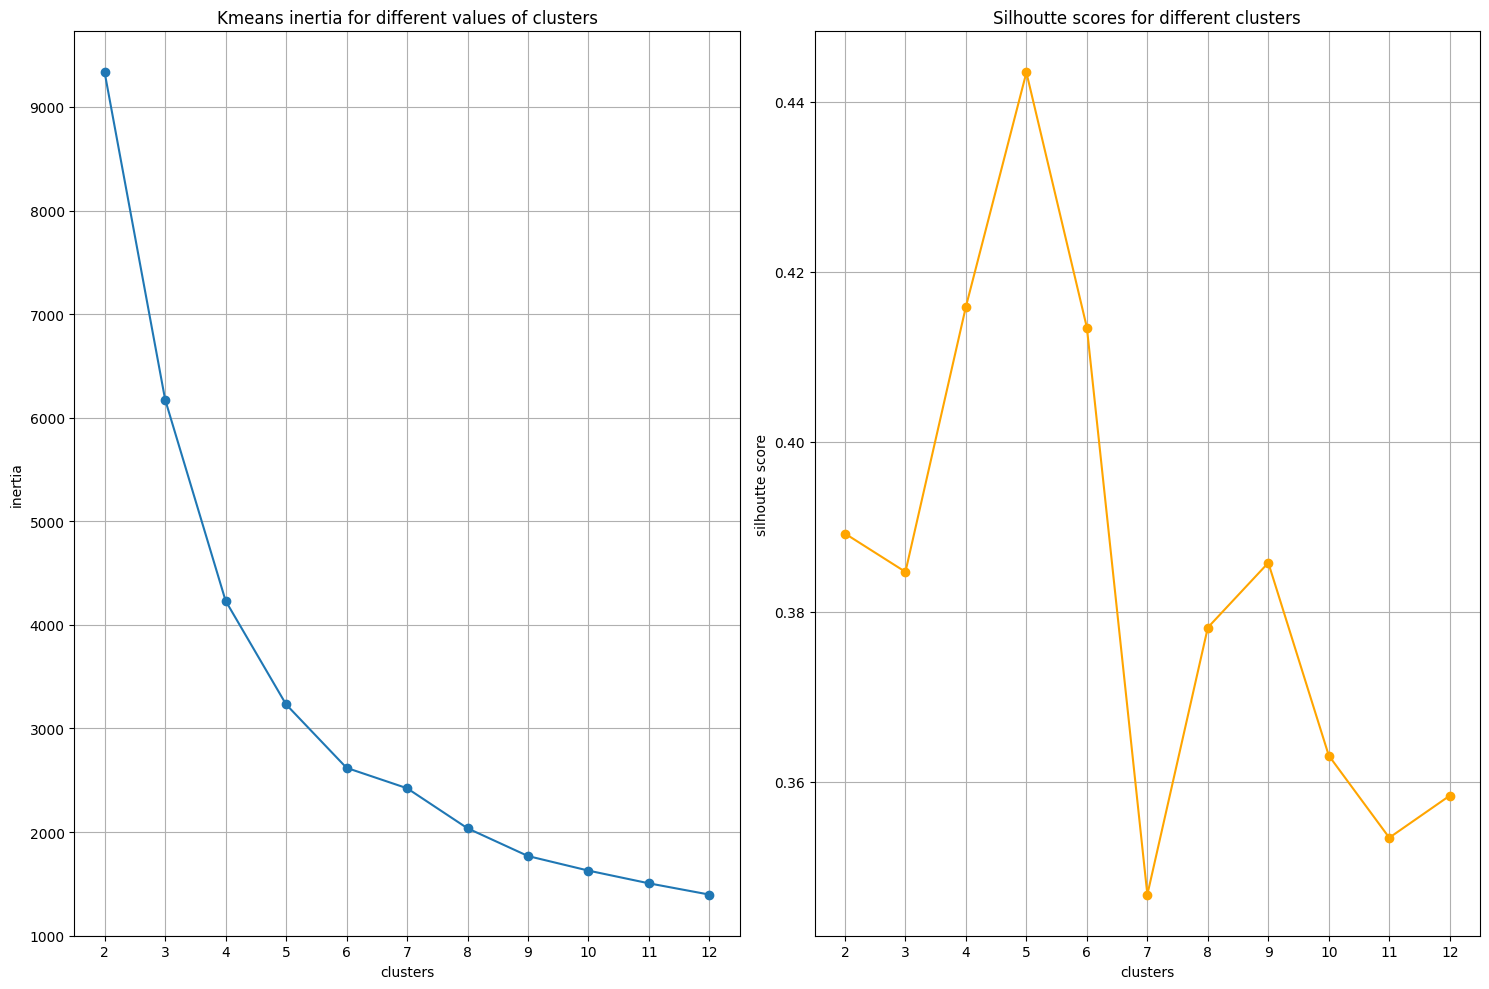

In [24]:
k_max = 12
inertia = []
silhoutte = []
clusters = range(2, k_max + 1)
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_labels = kmeans.fit_predict(scaled_df)
    silh = silhouette_score(scaled_df, cluster_labels)
    silhoutte.append(silh)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(clusters, inertia, marker='o')
plt.title("Kmeans inertia for different values of clusters")
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.xticks(clusters)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(clusters, silhoutte, marker='o', color='orange')
plt.title("Silhoutte scores for different clusters")
plt.xlabel("clusters")
plt.ylabel("silhoutte score")
plt.xticks(clusters)
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
kmean = KMeans(n_clusters=5, random_state=42, max_iter=1000)
cluster_label = kmean.fit_predict(scaled_df)
cluster_label

array([4, 4, 4, ..., 0, 1, 0], dtype=int32)

In [26]:
cleaned_no_outliers["Clusters"] = cluster_label

In [27]:
cleaned_no_outliers.head(75)
cleaned_no_outliers.describe()

,Quantity,Price,Customer ID,Sales,PurchaseFreq,Clusters
count,8040.00,8040.00,8040.00,8040.00,8040.00,8040.00
mean,7.62,2.92,15460.19,12.45,44.13,1.76
std,10.95,2.69,1660.99,9.36,27.50,1.45
min,1.00,0.06,12359.00,0.06,1.00,0.00
25%,2.00,1.25,14061.00,4.95,22.00,0.00
50%,4.00,2.10,15485.00,10.50,39.00,2.00
75%,12.00,3.75,16918.00,17.70,61.00,3.00
max,288.00,29.95,18223.00,42.00,123.00,4.00


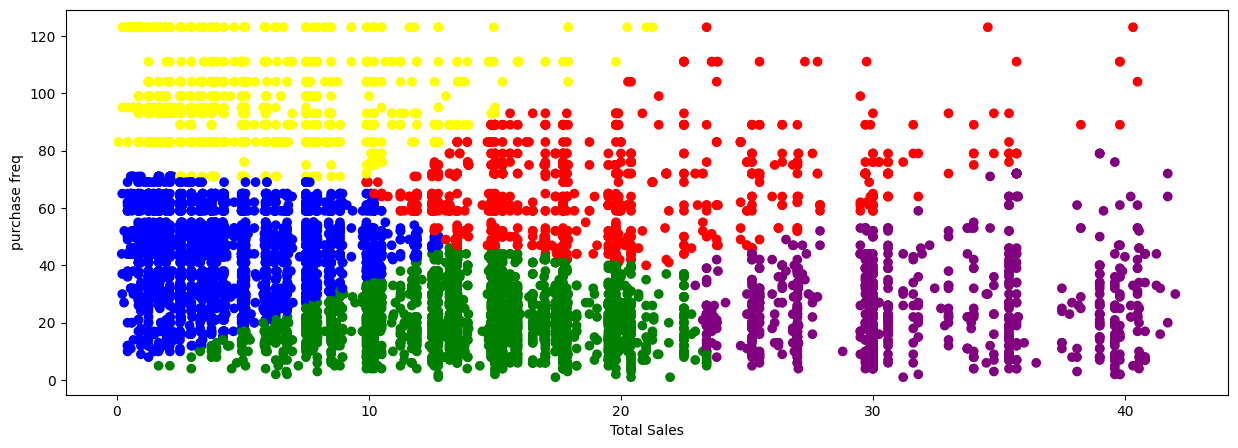

In [28]:
cluster_colors = {
    0: 'blue',
    1: 'red',
    2: 'yellow',
    3: 'green',
    4: 'purple'  # Add this if needed
}

# Map cluster labels to colors
colors = cleaned_no_outliers["Clusters"].map(cluster_colors)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

# Correct use of color parameter
scatter = ax.scatter(
    cleaned_no_outliers["Sales"],
    cleaned_no_outliers["PurchaseFreq"],
    c=colors,   # use mapped colors
    marker='o'
)

# Correct axis labeling
ax.set_xlabel("Total Sales")
ax.set_ylabel("purchase freq")

plt.show()


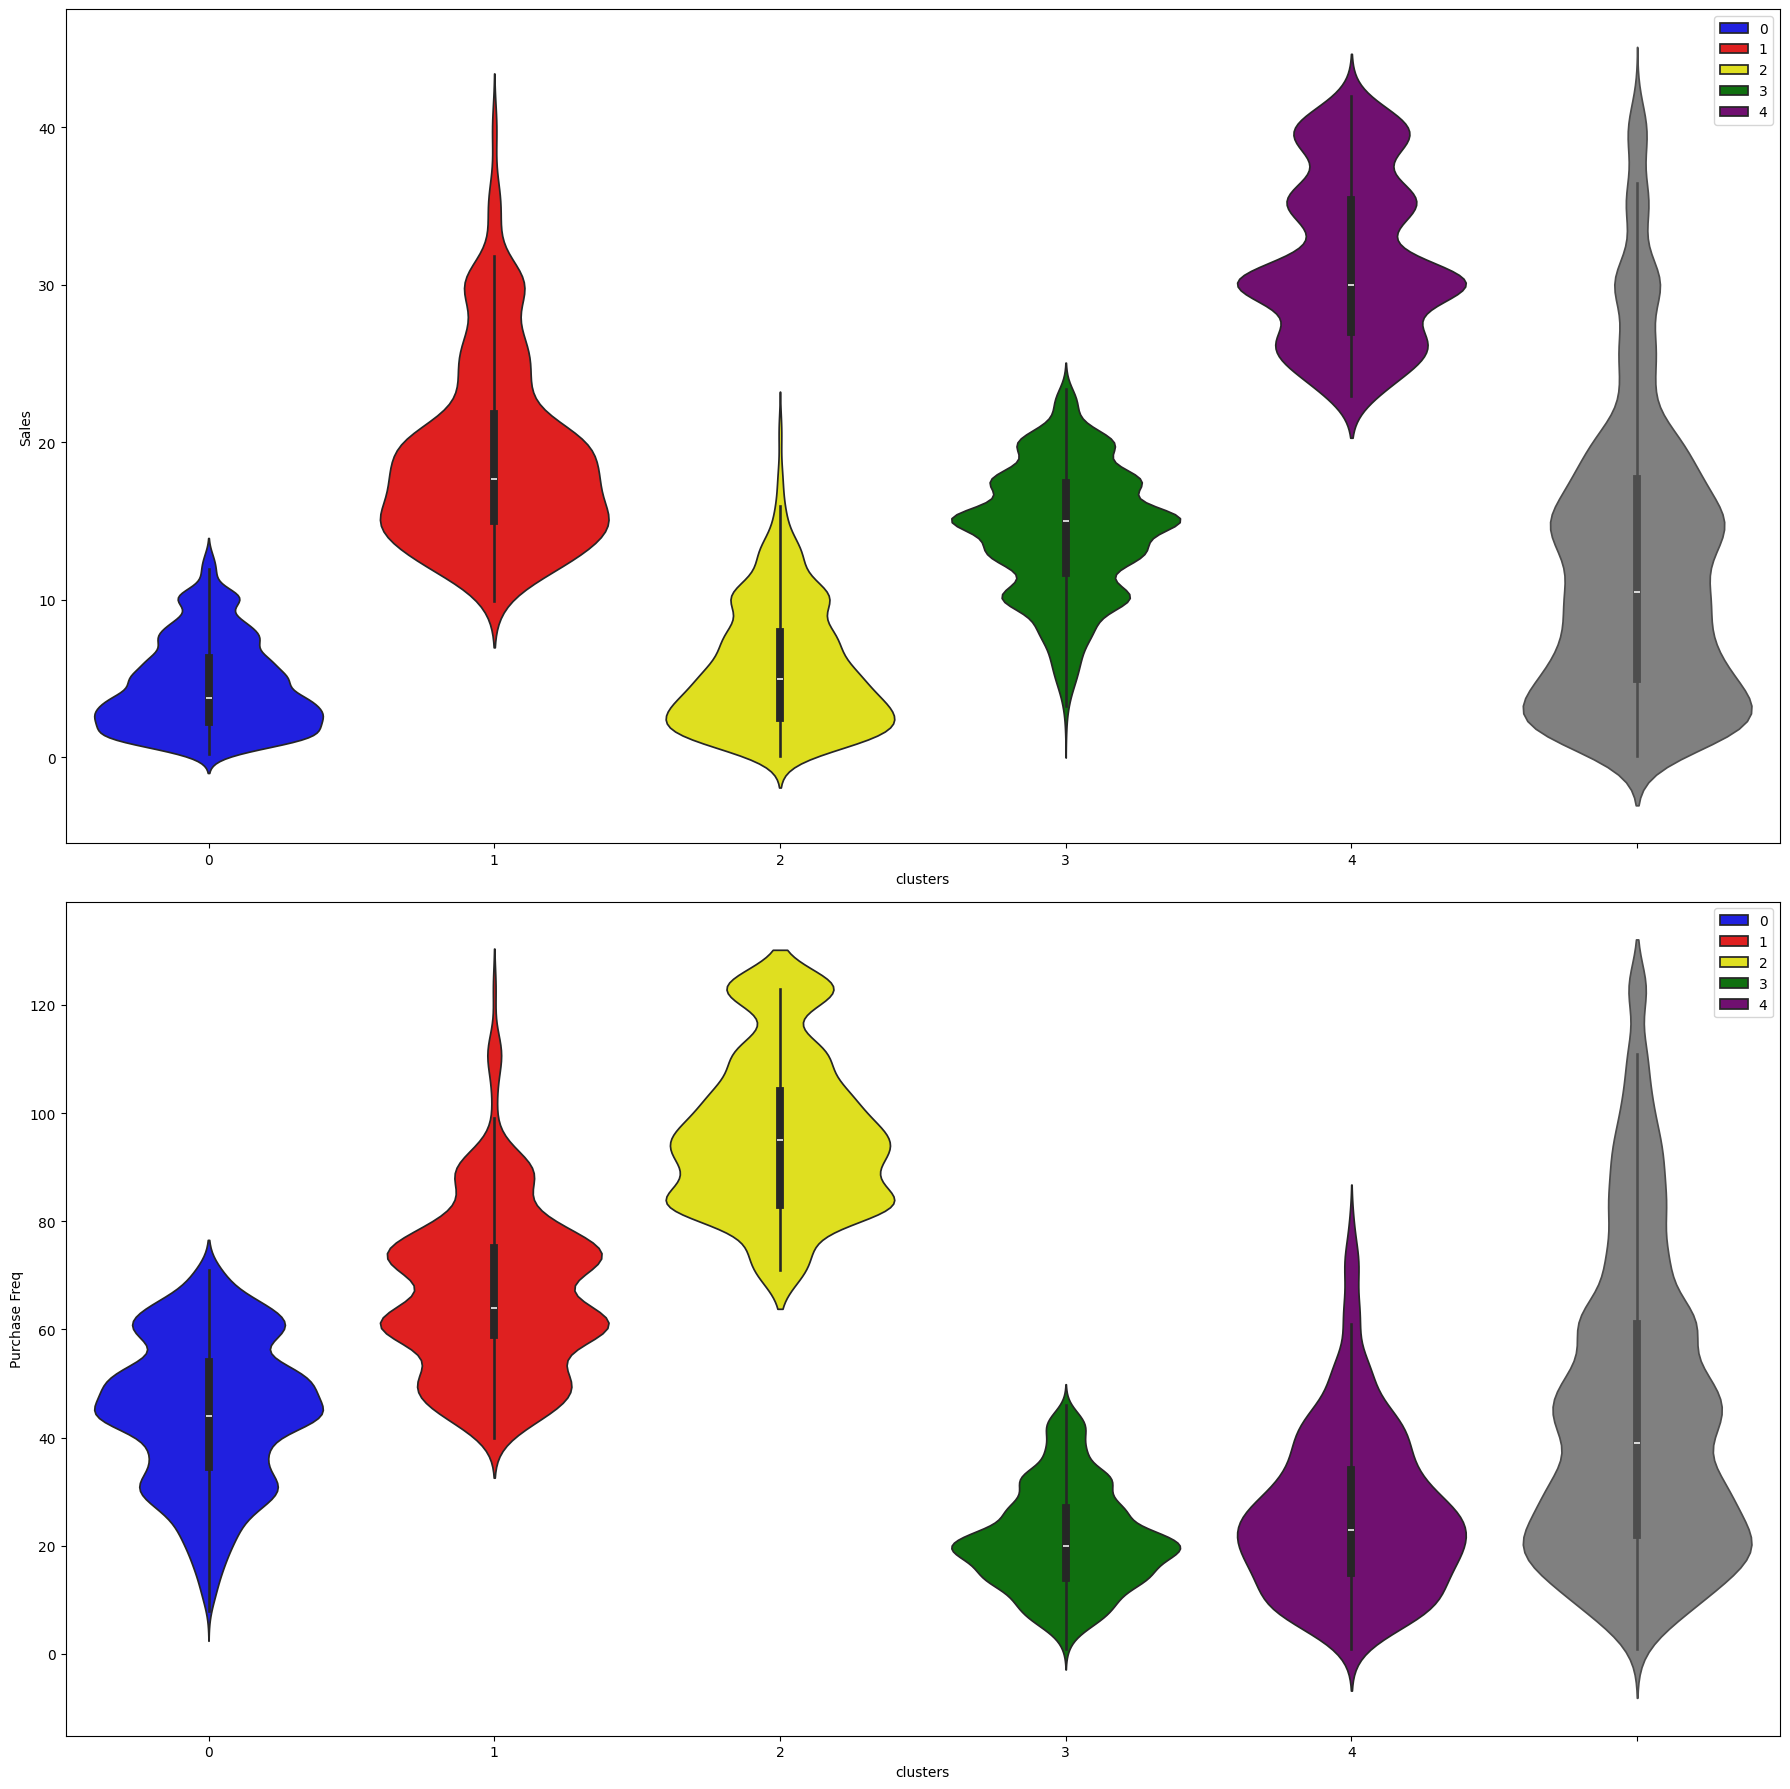

In [29]:
plt.figure(figsize=(18,18))

plt.subplot(2,1,1)
sns.violinplot(x=cleaned_no_outliers["Clusters"], y=cleaned_no_outliers["Sales"], palette=cluster_colors, hue=cleaned_no_outliers["Clusters"])
sns.violinplot(y=cleaned_no_outliers["Sales"], color='gray')
plt.xlabel("clusters")
plt.ylabel("Sales")

plt.subplot(2,1,2)
sns.violinplot(x=cleaned_no_outliers["Clusters"], y=cleaned_no_outliers["PurchaseFreq"], palette=cluster_colors, hue=cleaned_no_outliers["Clusters"])
sns.violinplot(y=cleaned_no_outliers["PurchaseFreq"], color='gray')
plt.xlabel("clusters")
plt.ylabel("Purchase Freq")

plt.tight_layout()
plt.show()

In [30]:
purchase_outliers = cleaned_df[(cleaned_df["Sales"] > m_upper) | (cleaned_df["Sales"] < m_lower)].copy()
freq_outliers = cleaned_df[(cleaned_df["PurchaseFreq"] > f_upper) | (cleaned_df["PurchaseFreq"] < f_lower)].copy()


In [31]:
overlap_indices = purchase_outliers.index.intersection(freq_outliers.index)

freq_only = freq_outliers.drop(overlap_indices)
purchase_only = purchase_outliers.drop(overlap_indices)


freq_only["Clusters"] = -1
purchase_only["Clusters"] = -2


outlier_df = pd.concat([freq_only, purchase_only])

In [33]:
len(overlap_indices)

0

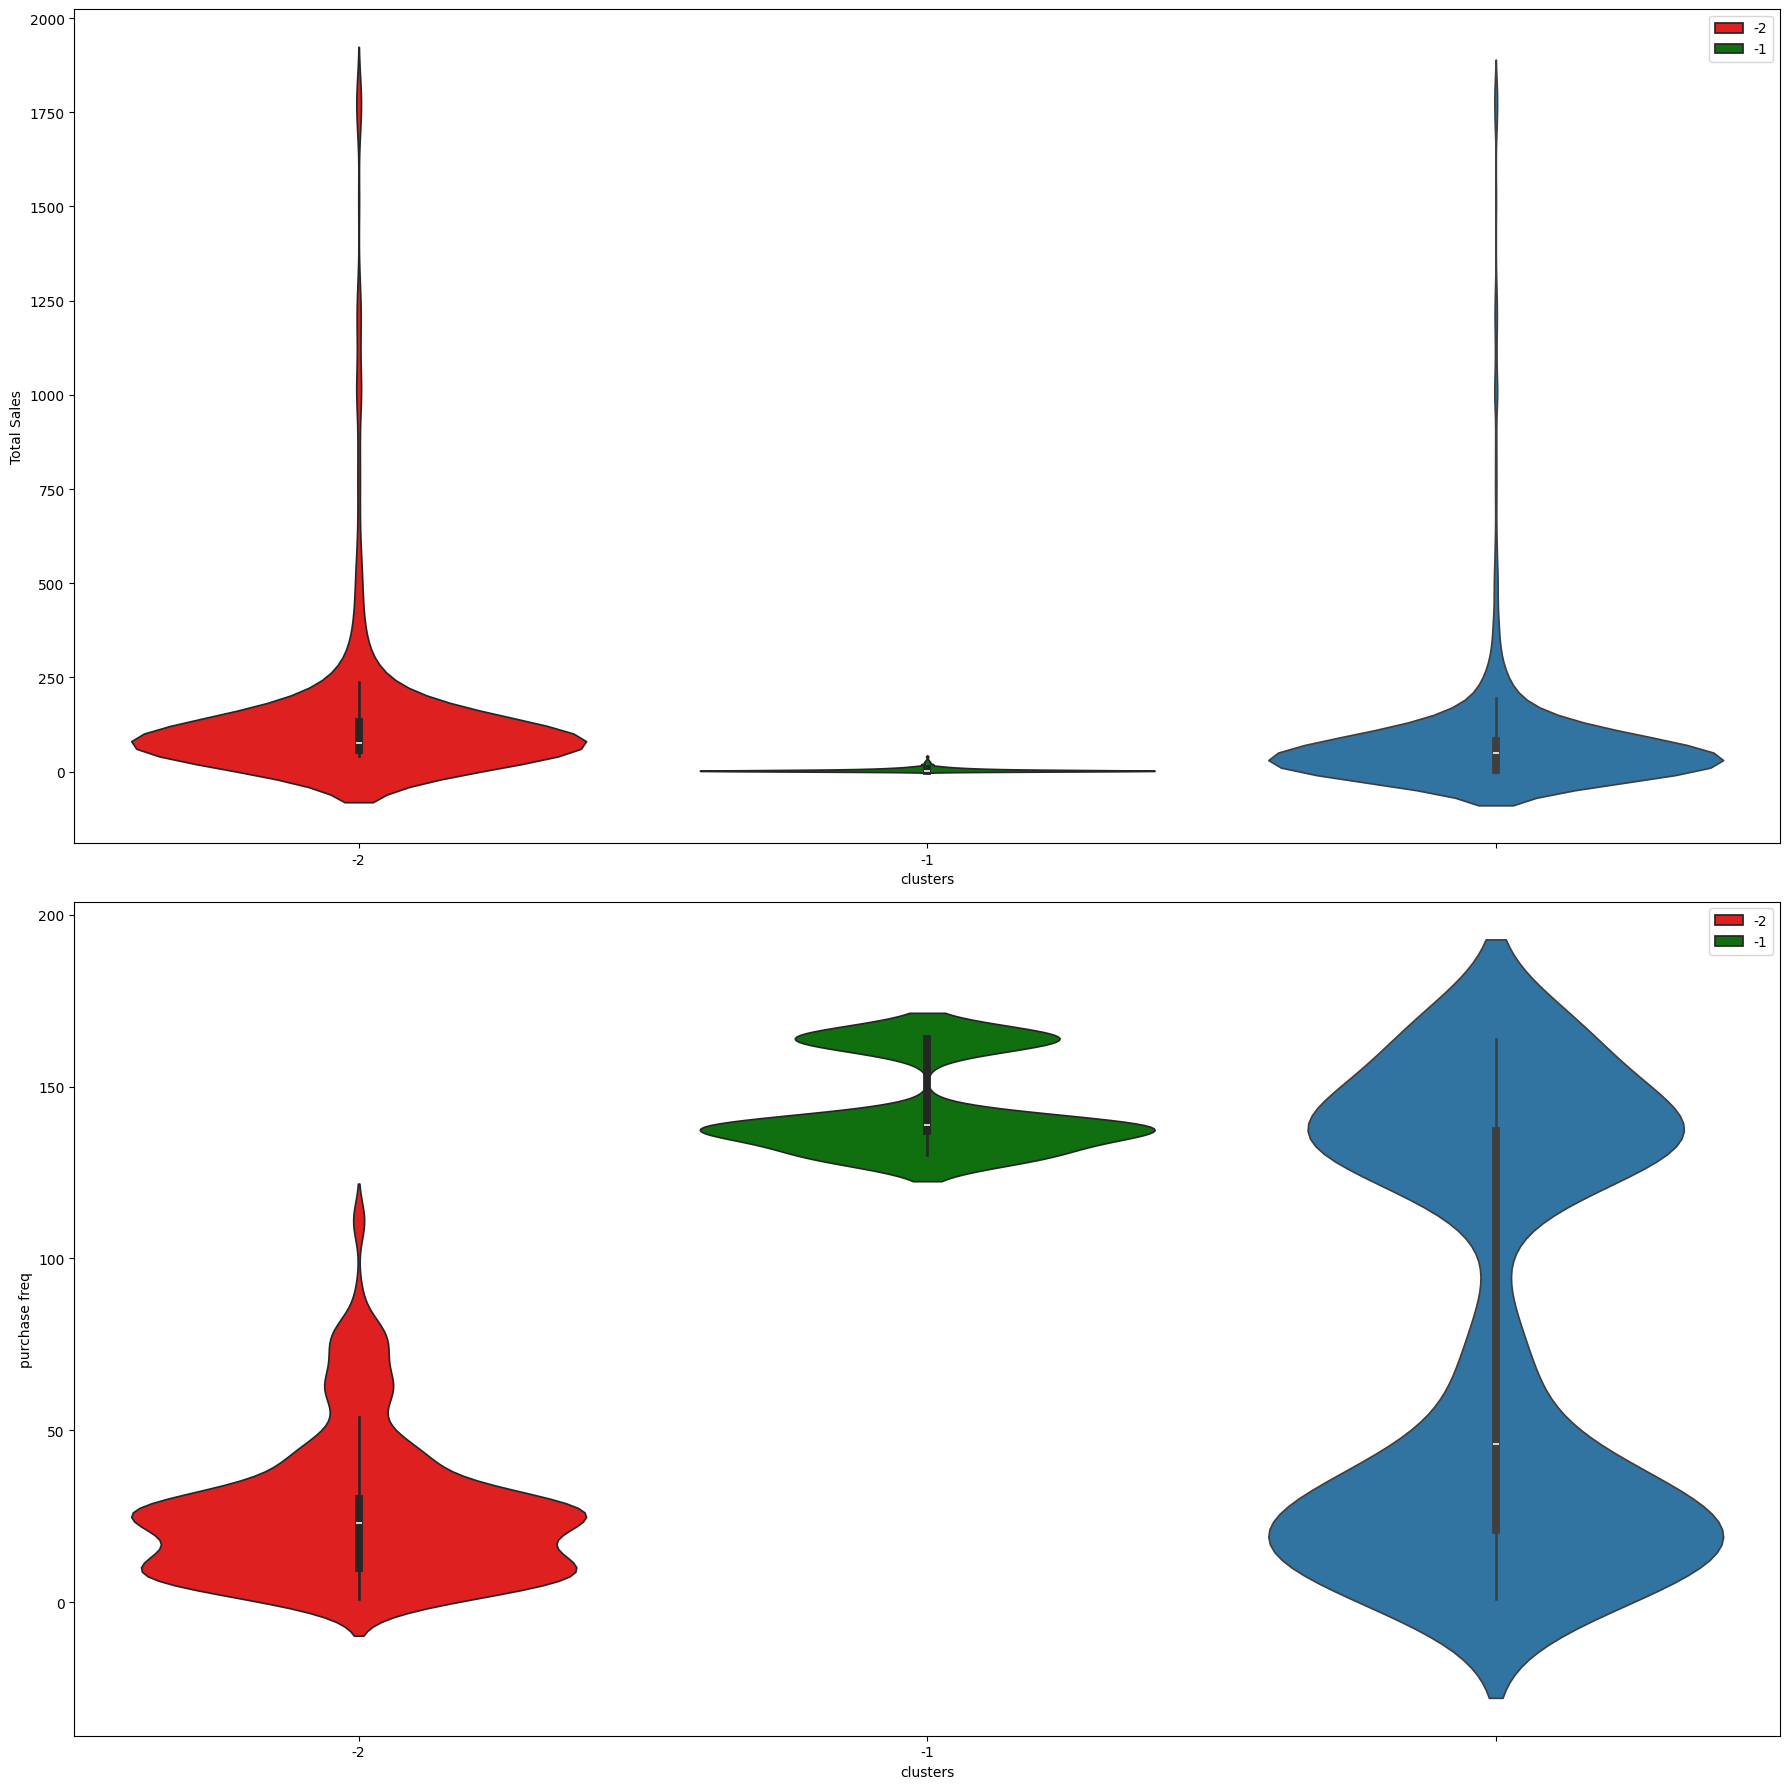

In [34]:
cluster_colors = {
    -1: 'green',
    -2: 'red',
    -3: 'blue'
}

plt.figure(figsize=(18,18))

plt.subplot(2,1,1)
sns.violinplot(x=outlier_df["Clusters"], y=outlier_df["Sales"], palette=cluster_colors, hue=outlier_df["Clusters"])
sns.violinplot(y=outlier_df["Sales"])
plt.xlabel("clusters")
plt.ylabel("Total Sales")

plt.subplot(2,1,2)
sns.violinplot(x=outlier_df["Clusters"], y=outlier_df["PurchaseFreq"], palette=cluster_colors, hue=outlier_df["Clusters"])
sns.violinplot(y=outlier_df["PurchaseFreq"])
plt.xlabel("clusters")
plt.ylabel("purchase freq")

plt.tight_layout()
plt.show()